<a href="https://colab.research.google.com/github/pyMelo/UniversityWorldRanking/blob/main/university_raking_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [1]:
!pip install scikit-learn pandas numpy matplotlib geopandas

In [2]:
from google.colab import files

upload_files = files.upload()



Saving cwurData.csv to cwurData.csv
Saving education_expenditure_supplementary_data.csv to education_expenditure_supplementary_data.csv
Saving educational_attainment_supplementary_data.csv to educational_attainment_supplementary_data.csv
Saving school_and_country_table.csv to school_and_country_table.csv
Saving shanghaiData.csv to shanghaiData.csv
Saving timesData.csv to timesData.csv


# Code for modified datasets
- in **timesdata** ricalcolciamo il total_score e aggingiamo gli 0 dove sono presenti dei NaN
- in **shanghaidata** aggiungiamo la colonna "country" dato che non è presente, utilizzando il dataset "school_and_country_table" dove sono presenti le università associate al Paese
- modifichiamo il timesData sistemando la classifica, trasformando i valori come "201-250" assegnando una singola posizione invece del range
- viene creato un nuovo csv per l'anno 2016 e cambiando la colonna female_male_ratio inserendo solo la percentuale di donne

In [10]:
import pandas as pd

df = pd.read_csv('timesData.csv')
columns_to_replace_na = ['teaching', 'international', 'research', 'citations', 'income', 'total_score']
df[columns_to_replace_na] = df[columns_to_replace_na].replace('-', pd.NA)

numeric_columns = ['teaching', 'international', 'research', 'citations', 'income', 'total_score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df['income'].fillna(0, inplace=True)
df['international'].fillna(0, inplace=True)

df['total_score'] = (
    0.3 * df['teaching'] +
    0.075 * df['international'] +
    0.3 * df['research'] +
    0.3 * df['citations'] +
    0.025 * df['income']
)
df['total_score'] = df['total_score'].astype(float)

df = df.round({'teaching': 1, 'international': 1, 'research': 1, 'citations': 1, 'income': 1, 'total_score': 1})

df.to_csv('timesData_estimated_total_score.csv', index=False)


## "shanghaiData"  to -> "shanghaiData_country_table"
- Added the column country using the "school_and_country_table"

In [62]:
import pandas as pd

shanghai_df = pd.read_csv('shanghaiData.csv')

school_df = pd.read_csv('school_and_country_table.csv')

merged_df = pd.merge(shanghai_df, school_df, how='left', left_on='university_name', right_on='school_name')

shanghai_df['country'] = merged_df['country']

shanghai_df.to_csv('shanghaiData_country_table.csv', index=False)


## "timesData_estimated_total_score" to -> "timesData_unique_ranking"
- Dopo aver sistemato i total_score mancanti è stata sistemata la classificazione togliendo i valori ad es: 201-205(range) in valori unici ad es: 201,202,203, ... , 250

In [4]:
import pandas as pd

df = pd.read_csv('timesData_estimated_total_score.csv')

df['world_rank'] = df['world_rank'].str.replace('=', '').str.replace('<', '')
df['world_rank'] = df['world_rank'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))

df['world_rank'] = df.groupby(['year']).cumcount() + 1

df.to_csv('timesData_unique_ranking.csv', index=False)


## "timesData_unique_ranking.csv" to -> "timesData_2016" & to -> "timesData_females"
- Questa è "l'unione" di tutti i precedenti timesData modificati, creando un sottocsv contenente dati solo del 2016 per comodità
- Creata una nuova colonna contenente solo la percentuale di donne (per comodità sulla linear regression)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timesData_unique_ranking.csv')

df['female_percentage'] = pd.to_numeric(df['female_male_ratio'].str.split(':').str[0], errors='coerce')

df['female_percentage'] = pd.to_numeric(df['female_male_ratio'].str.split(':').str[0], errors='coerce')

df.to_csv('timesData_females.csv',index=False)
df_2016 = df[df['year'] == 2016]
df_2016.to_csv('timesData_2016.csv', index=False)

## "timesData_unique_ranking

 # HEAD

In [ ]:


df_cwur = pd.read_csv('cwurData.csv')

print(df_cwur.head())

   world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0  

```
# Questo è formattato come codice
```

# 1 Comparazione delle classifiche
- Times Ranking
- Shangai Ranking
- Cwur ranking
## Identificazione classifica delle università

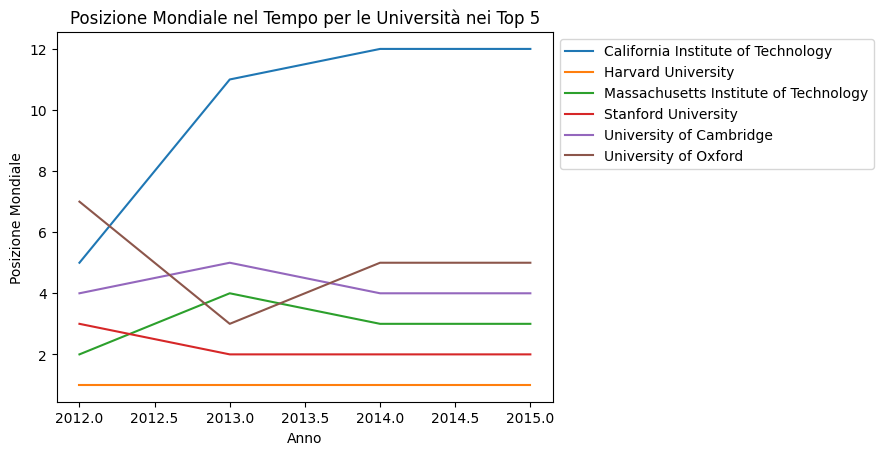

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv('cwurData.csv')  # Sostituisci con il percorso effettivo del tuo file

# Seleziona le università che si trovano nei top 20 in tutti gli anni
top5_universities = df.groupby('institution').filter(lambda x: x['world_rank'].min() <= 5)



for university, data in top5_universities.groupby('institution'):
    plt.plot(data['year'], data['world_rank'], label=university)

# Aggiungi etichette e titolo al plot
plt.xlabel('Anno')
plt.ylabel('Posizione Mondiale')
plt.title('Posizione Mondiale nel Tempo per le Università nei Top 5')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()


## 1.1 Ranking in cwurData

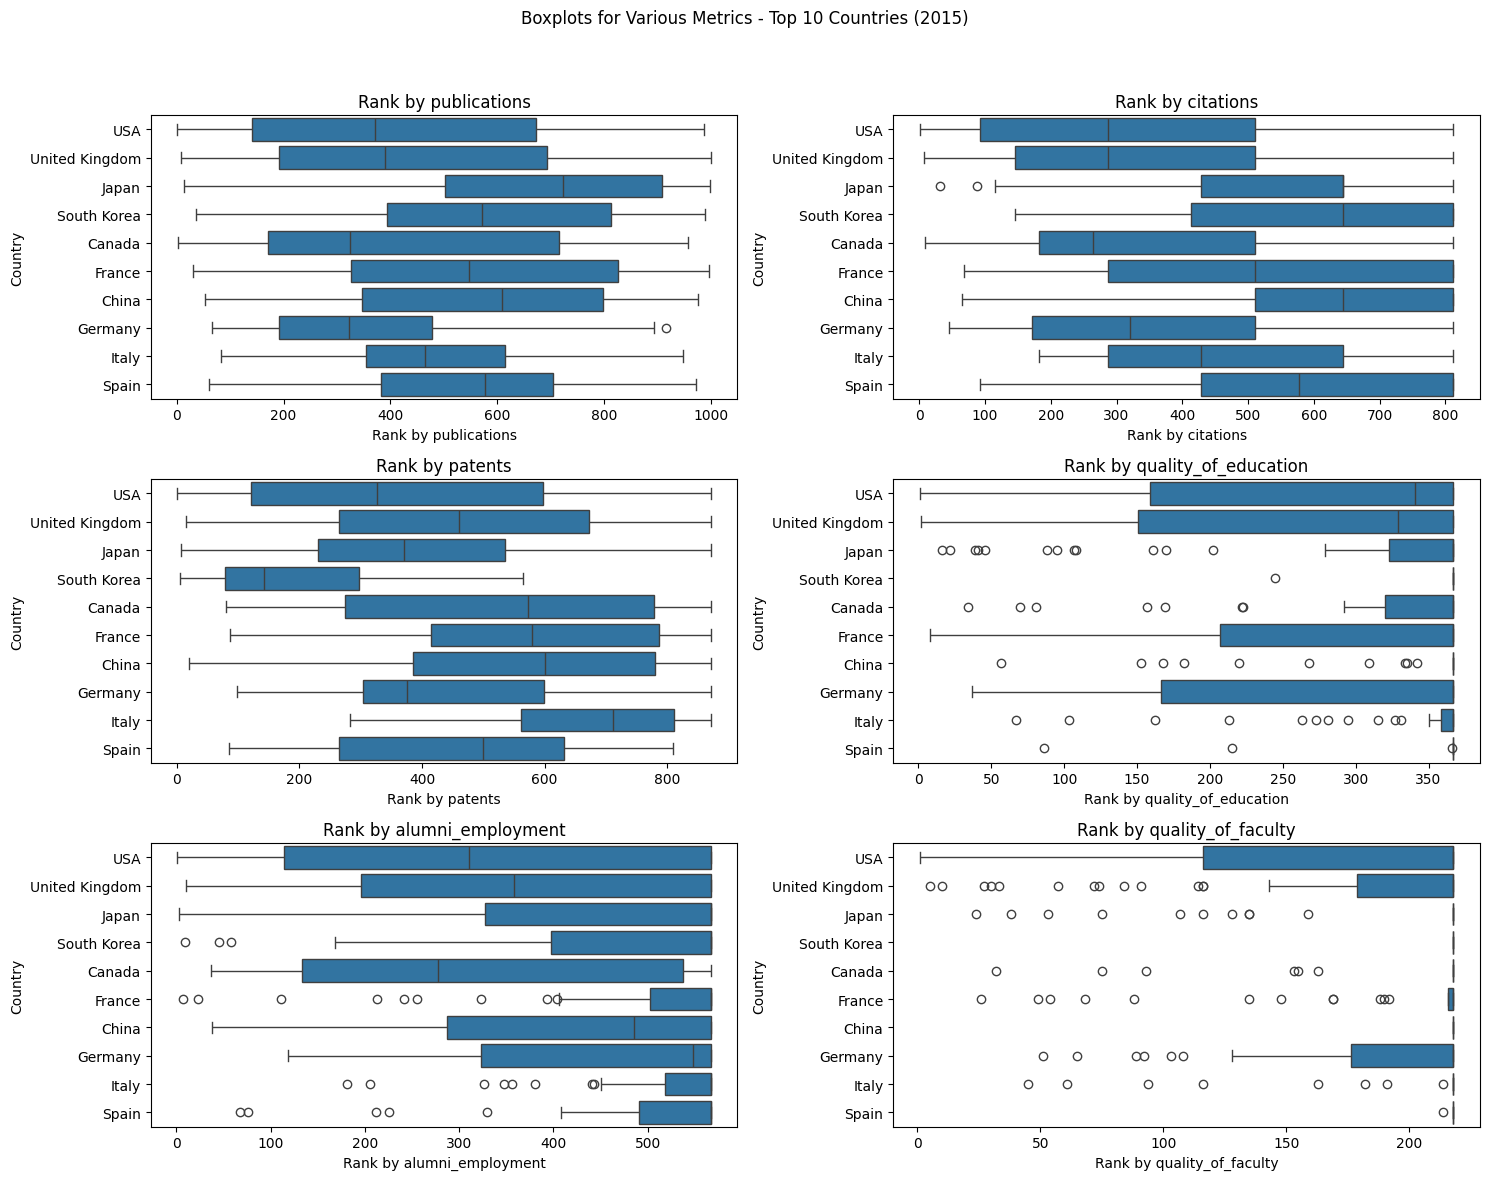

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cwurData.csv')  # Replace 'your_dataset.csv' with the actual file path

# Filter the dataset for the latest year (you can adjust this based on your data)
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]

# Select the top 10 countries based on the specified dimensions
top_10_countries = df_latest.groupby('country').size().nlargest(10).index
top_10_df = df_latest[df_latest['country'].isin(top_10_countries)]

# Define the metrics
metrics = ['publications', 'citations', 'patents',
           'quality_of_education', 'alumni_employment', 'quality_of_faculty']

# Plotting separate horizontal boxplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Boxplots for Various Metrics - Top 10 Countries ({})'.format(latest_year))

for i, metric in enumerate(metrics):
    sns.boxplot(x=metric, y='country', data=top_10_df, ax=axes[i//2, i%2], orient='h')
    axes[i//2, i%2].set_title(f'Rank by {metric}')
    axes[i//2, i%2].set_xlabel(f'Rank by {metric}')
    axes[i//2, i%2].set_ylabel('Country')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 1.2 Top Uni in ShanghaiData

<ipython-input-10-b94317b938f7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['world_rank'] = pd.to_numeric(latest_df['world_rank'], errors='coerce')


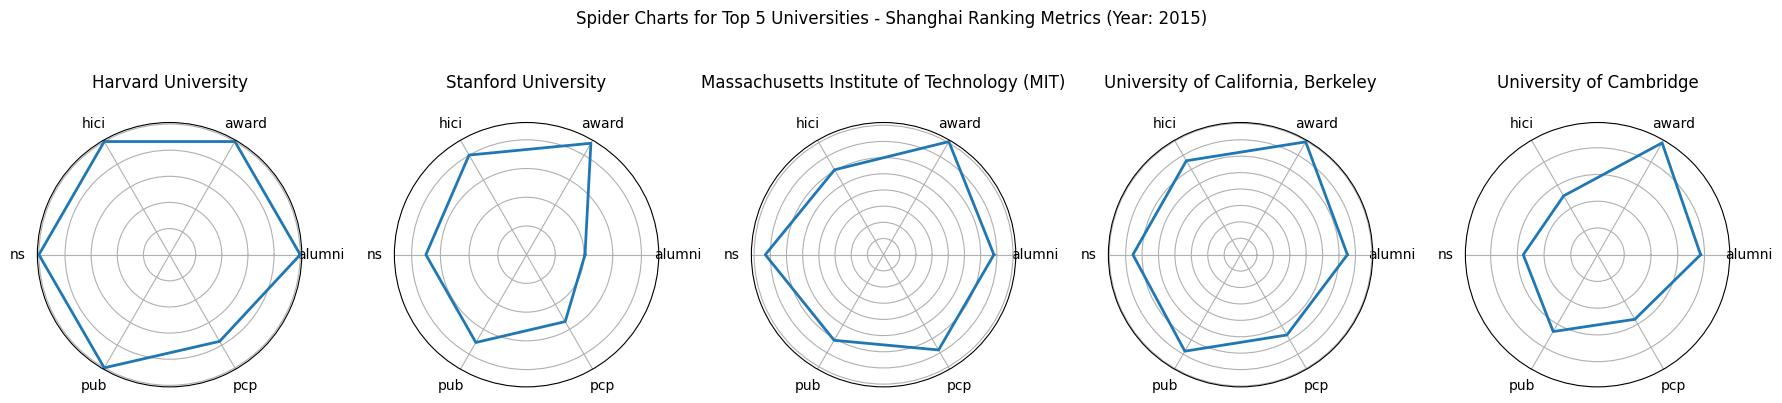

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Load the Shanghai dataset
shanghai_df = pd.read_csv('shanghaiData.csv')  # Replace with the actual file path

# Load the School dataset
school_df = pd.read_csv('school_and_country_table.csv')  # Replace with the actual file path

# Merge the Shanghai dataset with the School dataset using 'university_name'
merged_df = pd.merge(shanghai_df, school_df, how='left', left_on='university_name', right_on='school_name')

# Filter for the latest year
latest_year = merged_df['year'].max()
latest_df = merged_df[merged_df['year'] == latest_year]

# Convert 'world_rank' to numeric, handling errors
latest_df['world_rank'] = pd.to_numeric(latest_df['world_rank'], errors='coerce')

# Find the top 5 universities based on world rank in the latest year
top_5_universities = latest_df.nsmallest(5, 'world_rank')

# Define dimensions for the spider chart
dimensions = ['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

# Number of dimensions
num_dimensions = len(dimensions)

# Compute angle of each axis
angles = [n / float(num_dimensions) * 2 * pi for n in range(num_dimensions)]
angles += angles[:1]  # Close the plot

# Create a single row for the spider charts
fig, axes = plt.subplots(1, 5, figsize=(18, 4), subplot_kw=dict(polar=True))
fig.suptitle(f'Spider Charts for Top 5 Universities - Shanghai Ranking Metrics (Year: {latest_year})')

# Create the spider charts
for ax, (_, row) in zip(axes, top_5_universities.iterrows()):
    metrics = row[dimensions].values.tolist()

    # Plot the spider chart for the current university
    values = metrics + metrics[:1]  # Close the plot
    ax.plot(angles, values, linewidth=2, linestyle='solid')

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dimensions)
    ax.set_yticklabels([])  # Hide radial labels

    # Add title on top of the spider chart
    ax.set_title(row['university_name'], y=1.1)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


## 1.3 Country metrics value in ShanghaiData


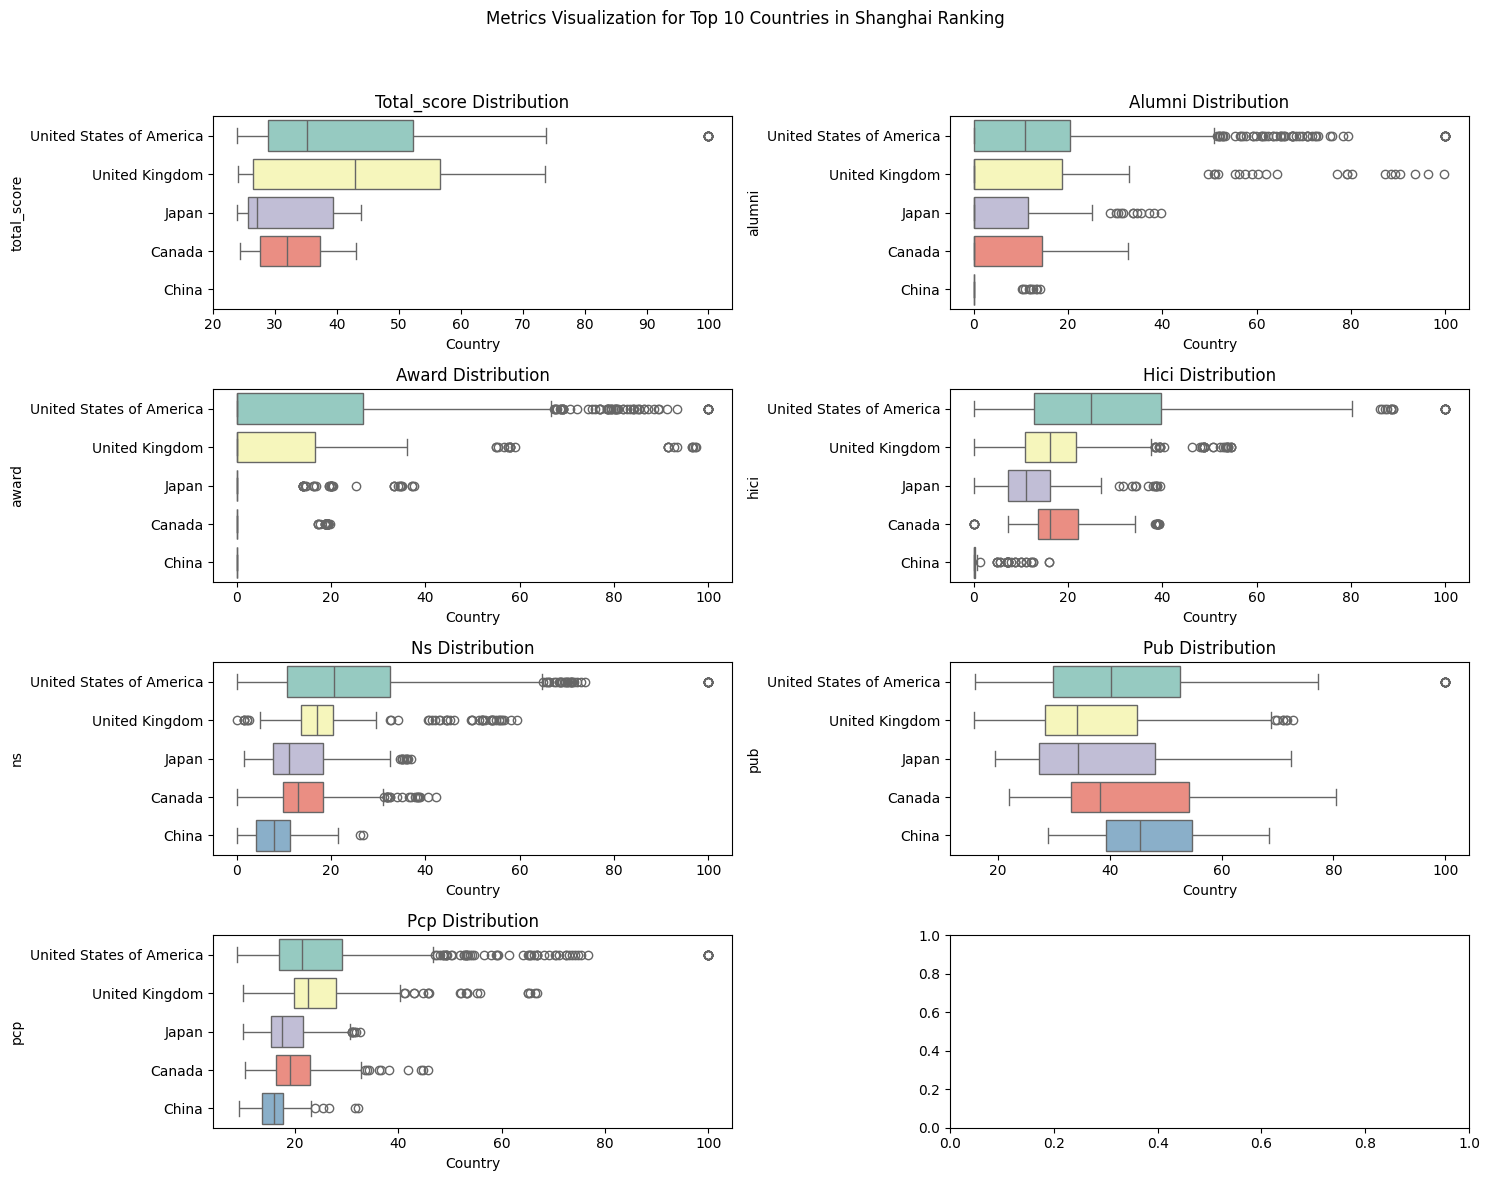

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Shanghai dataset
shanghai_df = pd.read_csv('shanghaiData.csv')  # Replace with the actual file path

# Load the School dataset
school_df = pd.read_csv('school_and_country_table.csv')  # Replace with the actual file path

# Merge the Shanghai dataset with the School dataset using 'university_name'
merged_df = pd.merge(shanghai_df, school_df, how='left', left_on='university_name', right_on='school_name')

# Find the top 10 countries based on the number of universities
top_10_countries = merged_df['country'].value_counts().nlargest(5).index

# Select data for the top 10 countries
top_10_df = merged_df[merged_df['country'].isin(top_10_countries)]

# Define metrics to visualize
metrics = ['total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

# Plotting separate boxplots for each metric
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
fig.suptitle('Metrics Visualization for Top 10 Countries in Shanghai Ranking')

for i, metric in enumerate(metrics):
    sns.boxplot(x=metric, y='country', data=top_10_df, ax=axes[i//2, i%2], palette='Set3',hue='country',legend=False)
    axes[i//2, i%2].set_title(f'{metric.capitalize()} Distribution')
    axes[i//2, i%2].set_xlabel('Country')
    axes[i//2, i%2].set_ylabel(metric)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 1.4 Adding 0 to missing values and recalculating the new total_score on TimesData



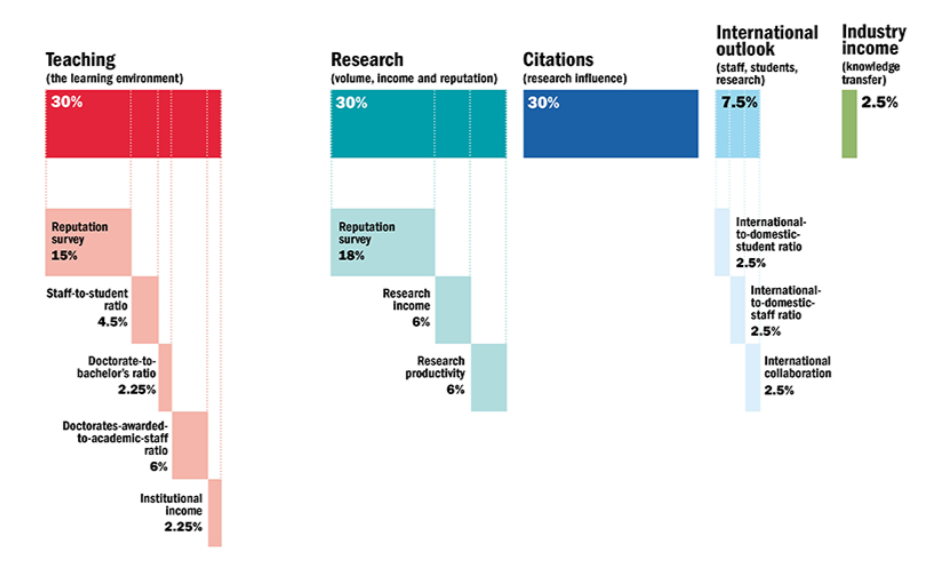

In [ ]:
from IPython.display import Image

image_path = 'weightTimesData.png'
Image(filename=image_path)

## Difference of total score timesData : original vs estimated total score
- The only difference is thet some of the total_score are missing or wrongly calculated.
- Took the weights and filled the NaN values too

In [ ]:
import pandas as pd

# Load the original and modified datasets
original_df = pd.read_csv('timesData.csv')  # Replace with the actual file path of the original dataset
modified_df = pd.read_csv('timesData_estimated_total_score.csv')  # Replace with the actual file path of the modified dataset

# Sort both datasets by total_score in descending order
original_top10 = original_df.sort_values(by='total_score', ascending=False).head(10)
modified_top10 = modified_df.sort_values(by='total_score', ascending=False).head(10)

# Display the difference in total_score for the top 10 universities
difference_df = pd.DataFrame({
    'University': original_top10['university_name'],
    'Original Total Score': original_top10['total_score'],
    'Modified Total Score': modified_top10['total_score'],
})

print(difference_df)


                                 University Original Total Score  \
0                        Harvard University                 96.1   
1        California Institute of Technology                 96.0   
2     Massachusetts Institute of Technology                 95.6   
3                       Stanford University                 94.3   
200      California Institute of Technology                 94.8   
602      California Institute of Technology                 95.5   
1002     California Institute of Technology                 94.9   
1402     California Institute of Technology                 94.3   
1803     California Institute of Technology                 95.2   
1804                   University of Oxford                 94.2   
1805                                    NaN                  NaN   

      Modified Total Score  
0                     95.5  
1                     94.9  
2                     95.1  
3                      NaN  
200                   94.8  
602      

# 2 Università italiane

##2.1 Ranking università italiane vs USA

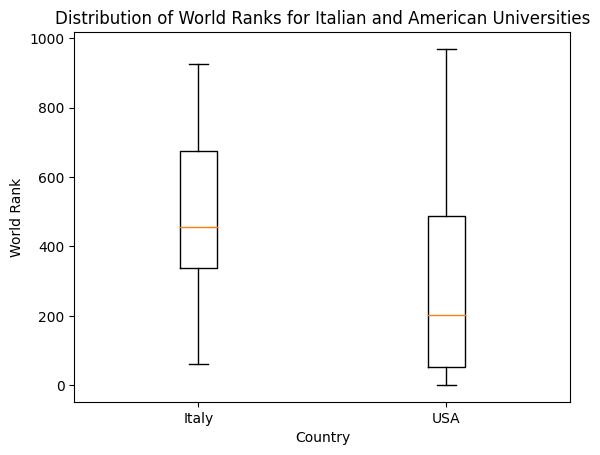

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cwur_df = pd.read_csv('cwurData.csv')

italian_universities = cwur_df[cwur_df['country'] == 'Italy']

american_universities = cwur_df[cwur_df['country'] == 'USA']

plt.boxplot([italian_universities['world_rank'], american_universities['world_rank']], labels=['Italy', 'USA'])
plt.xlabel('Country')
plt.ylabel('World Rank')
plt.title('Distribution of World Ranks for Italian and American Universities')
plt.show()


## 2.2 Università italiane presenti in ogni Dataset
- ShanghaiData (con la nuova colonna "country")
- TimesData (con il total score calcolato)
- cwurData

In [64]:
import pandas as pd

shanghai_df = pd.read_csv('shanghaiData_country_table.csv')
times_df = pd.read_csv('timesData_estimated_total_score.csv')
cwur_df = pd.read_csv('cwurData.csv')

shanghai_italian_df = shanghai_df[shanghai_df['country'] == 'Italy']

times_italian_df = times_df[times_df['country'] == 'Italy']

cwur_italian_df = cwur_df[cwur_df['country'] == 'Italy']

shanghai_italian_df = shanghai_italian_df.drop_duplicates(subset=['university_name'], keep='first')
times_italian_df = times_italian_df.drop_duplicates(subset=['university_name'], keep='first')
cwur_italian_df = cwur_italian_df.drop_duplicates(subset=['institution'], keep='first')

print("Italian Universities - Shanghai Data:")
print(shanghai_italian_df[['university_name', 'world_rank', 'total_score']])
print("\nItalian Universities - Times Data:")
print(times_italian_df[['university_name', 'world_rank', 'total_score']])
print("\nItalian Universities - CWUR Data:")
print(cwur_italian_df[['institution', 'world_rank', 'score']])


Italian Universities - Shanghai Data:
                              university_name world_rank  total_score
141                       University of Milan    101-152          NaN
143                        University of Pisa    101-152          NaN
192                       University of Padua    153-202          NaN
197                       University of Turin    153-202          NaN
256                     University of Bologna    203-300          NaN
263                    University of Florence    203-300          NaN
278          University of Naples Federico II    203-300          NaN
365                    University of Cagliari    301-400          NaN
369                     University of Ferrara    301-400          NaN
380                     University of Palermo    301-400          NaN
382                       University of Pavia    301-400          NaN
442           Polytechnic University of Turin    401-500          NaN
480                       University of Parma    401

## 2.3 Differenza parametri top 5 ita vs top 5 mondo

<ipython-input-102-22c458887954>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')


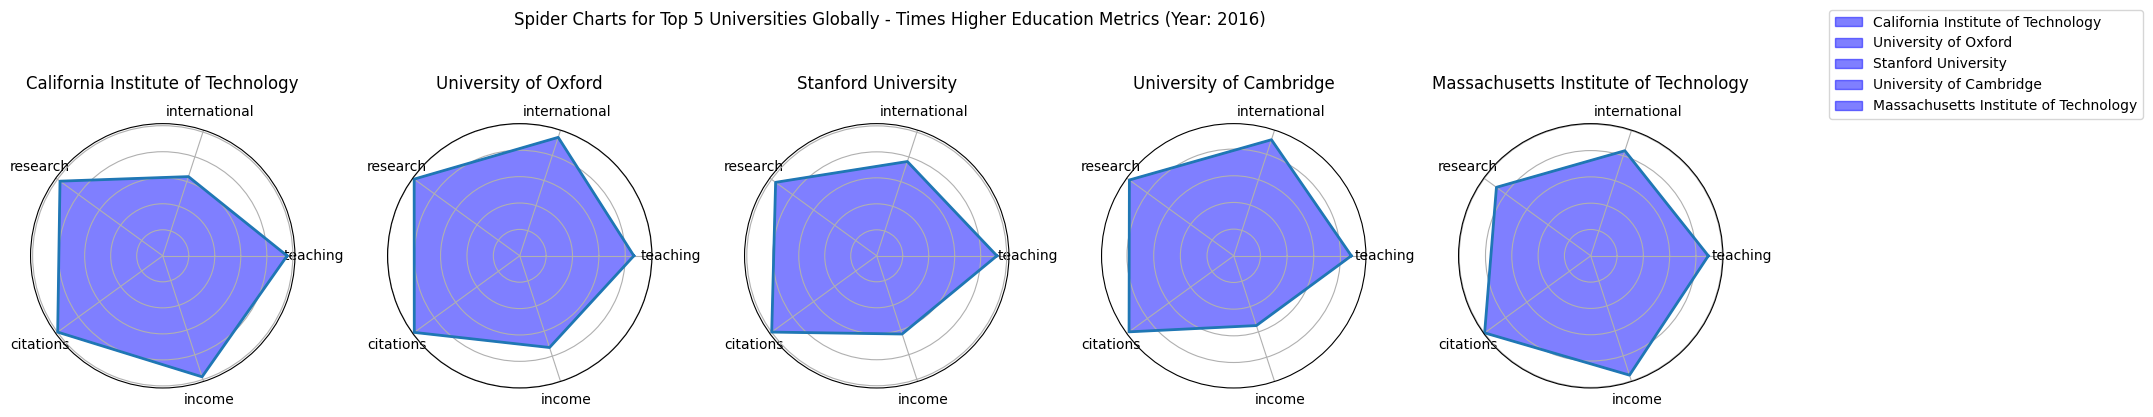

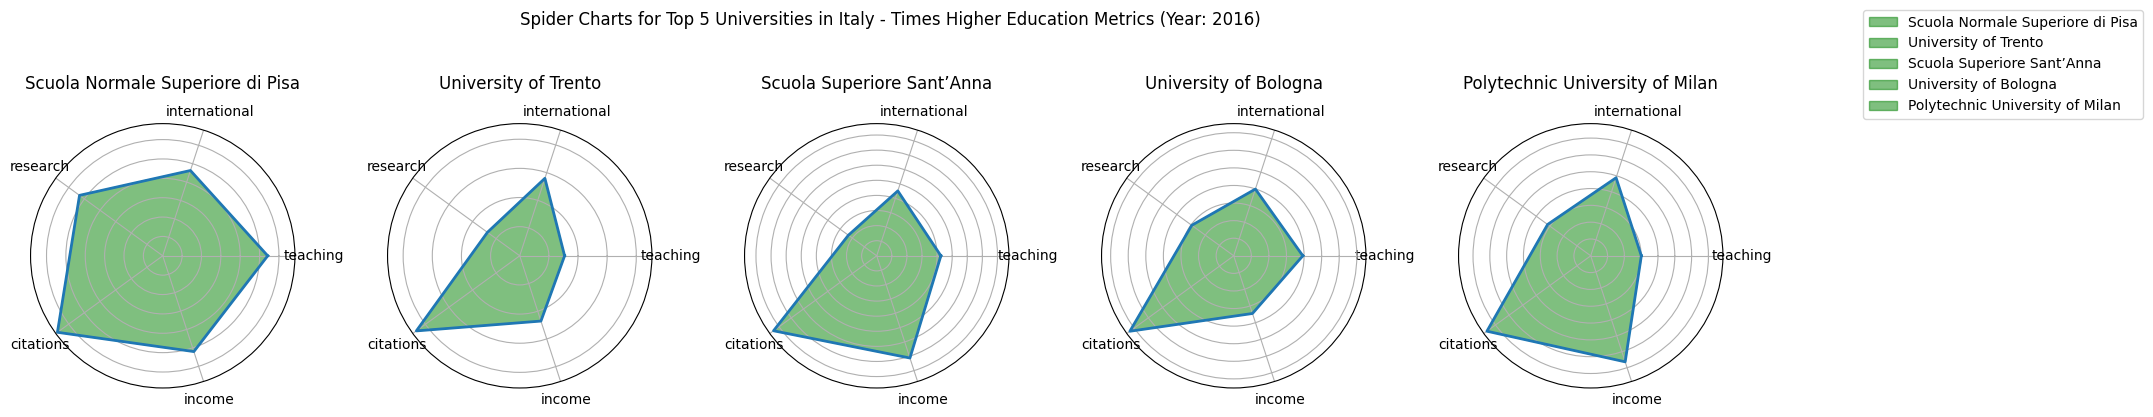

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
times_df = pd.read_csv('modified_timesData.csv')  # Replace with the actual file path

latest_year_times = times_df['year'].max()
latest_times_df = times_df[times_df['year'] == latest_year_times]

latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')

top_5_world_universities = latest_times_df.nsmallest(5, 'world_rank')

top_5_italian_universities = latest_times_df[latest_times_df['country'] == 'Italy'].nsmallest(5, 'world_rank')

dimensions_times = ['teaching', 'international', 'research', 'citations', 'income']

num_dimensions_times = len(dimensions_times)

angles_times = [n / float(num_dimensions_times) * 2 * pi for n in range(num_dimensions_times)]
angles_times += angles_times[:1]

fig_world, axes_world = plt.subplots(1, 5, figsize=(18, 4), subplot_kw=dict(polar=True))
fig_world.suptitle(f'Spider Charts for Top 5 Universities Globally - Times Higher Education Metrics (Year: {latest_year_times})')

for ax_world, (_, row_world) in zip(axes_world, top_5_world_universities.iterrows()):
    metrics_world = row_world[dimensions_times].values.tolist()

    values_world = metrics_world + metrics_world[:1]
    ax_world.fill(angles_times, values_world, alpha=0.5, color='blue', label=row_world['university_name'])
    ax_world.plot(angles_times, values_world, linewidth=2, linestyle='solid', alpha=1)

    ax_world.set_xticks(angles_times[:-1])
    ax_world.set_xticklabels(dimensions_times)
    ax_world.set_yticklabels([])

    ax_world.set_title(row_world['university_name'], y=1.1)

fig_world.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

fig_italy, axes_italy = plt.subplots(1, 5, figsize=(18, 4), subplot_kw=dict(polar=True))
fig_italy.suptitle(f'Spider Charts for Top 5 Universities in Italy - Times Higher Education Metrics (Year: {latest_year_times})')

for ax_italy, (_, row_italy) in zip(axes_italy, top_5_italian_universities.iterrows()):
    metrics_italy = row_italy[dimensions_times].values.tolist()
    values_italy = metrics_italy + metrics_italy[:1]
    ax_italy.fill(angles_times, values_italy, alpha=0.5, color='green', label=row_italy['university_name'])
    ax_italy.plot(angles_times, values_italy, linewidth=2, linestyle='solid', alpha=1)

    ax_italy.set_xticks(angles_times[:-1])
    ax_italy.set_xticklabels(dimensions_times)
    ax_italy.set_yticklabels([])

    ax_italy.set_title(row_italy['university_name'], y=1.1)

fig_italy.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


##2.4 Andamento classifica nei vari dataset (ITA) durante gli anni


### 2.4.1 Andamento per timesData

- alcune università hanno la stessa posizione in classifica, denotata con un "=" , quindi potrebbero esserci piu università nella stessa posizione, come ad esempio "=149"

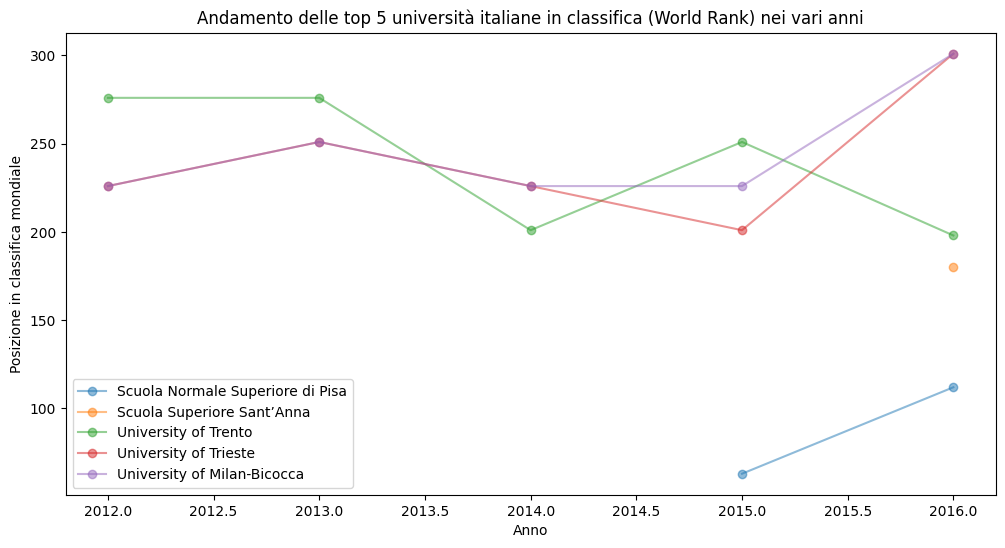

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timesData_estimated_total_score.csv')

df['world_rank'] = df['world_rank'].apply(lambda x: int(x.replace('=', '')) if '=' in x else int(x.split('-')[0]))

italian_universities = df[df['country'] == 'Italy']

top_5_italian_universities = italian_universities.groupby('university_name')['world_rank'].mean().sort_values().head(5).index

df_filtered = italian_universities[italian_universities['university_name'].isin(top_5_italian_universities)]

plt.figure(figsize=(12, 6))
for university in top_5_italian_universities:
    university_data = df_filtered[df_filtered['university_name'] == university]
    plt.plot(university_data['year'], university_data['world_rank'], label=university,marker='o',alpha=0.5)

plt.xlabel('Anno')
plt.ylabel('Posizione in classifica mondiale')
plt.title('Andamento delle top 5 università italiane in classifica (World Rank) nei vari anni')
plt.legend()
plt.show()


### 2.4.2 Andamento università in ShanghaiData


- prima creaiamo un nuovo shanghai dataset aggiungendo la colonna "country" che manca utilizzando lo school and country table

### 2.4.3 Andamneto classifica università italiane nel dataset modificato

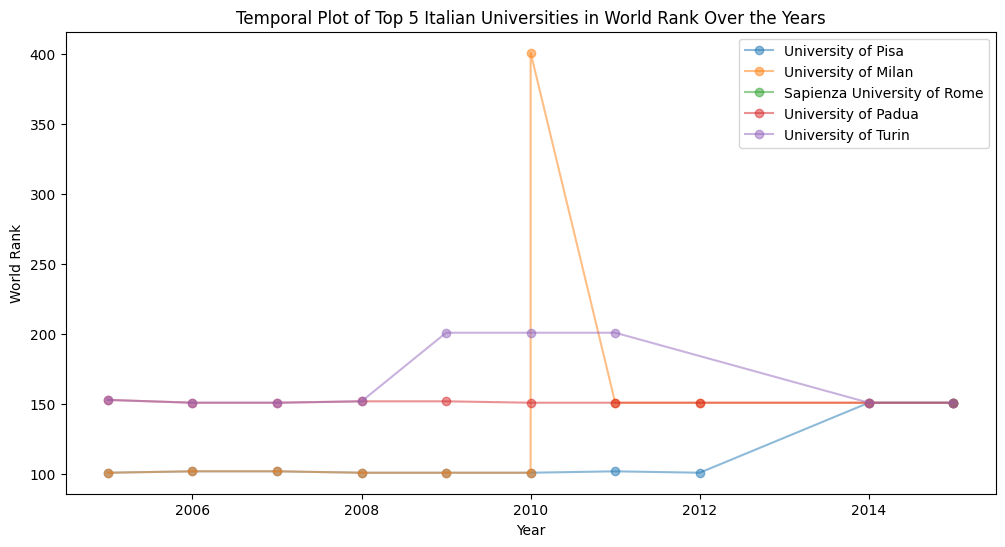

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

shanghai_df = pd.read_csv('shanghaiData_country_table.csv')

shanghai_df['world_rank'] = shanghai_df['world_rank'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))

italian_universities = shanghai_df[shanghai_df['country'] == 'Italy']

top_5_italian_universities = italian_universities.groupby('university_name')['world_rank'].mean().sort_values().head(5).index

plt.figure(figsize=(12, 6))
for university in top_5_italian_universities:
    university_data = italian_universities[italian_universities['university_name'] == university]
    plt.plot(university_data['year'], university_data['world_rank'], label=university, marker='o',alpha=0.5)

plt.xlabel('Year')
plt.ylabel('World Rank')
plt.title('Temporal Plot of Top 5 Italian Universities in World Rank Over the Years')
plt.legend()
plt.show()


### 2.4.4 Andamneto università in CWURData

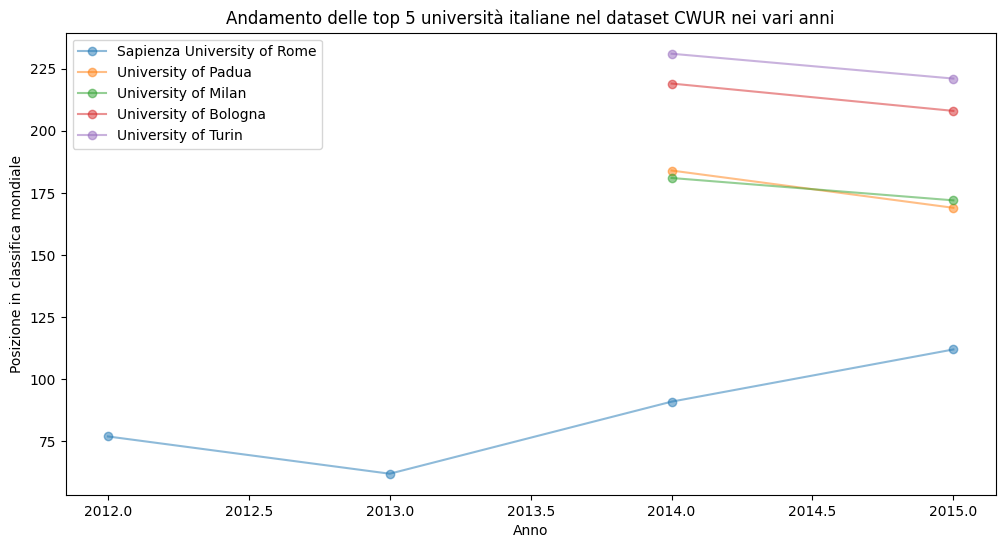

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cwur_df = pd.read_csv('cwurData.csv')

italian_universities_cwur = cwur_df[cwur_df['country'] == 'Italy']

top_5_italian_universities_cwur = italian_universities_cwur.groupby('institution')['world_rank'].mean().sort_values().head(5).index

plt.figure(figsize=(12, 6))
for university in top_5_italian_universities_cwur:
    university_data_cwur = italian_universities_cwur[italian_universities_cwur['institution'] == university]
    plt.plot(university_data_cwur['year'], university_data_cwur['world_rank'], label=university,marker='o',alpha=0.5)

plt.xlabel('Anno')
plt.ylabel('Posizione in classifica mondiale')
plt.title('Andamento delle top 5 università italiane nel dataset CWUR nei vari anni')
plt.legend()
plt.show()


## 2.5 Dove peccano le università italiane in CwurData e timesData

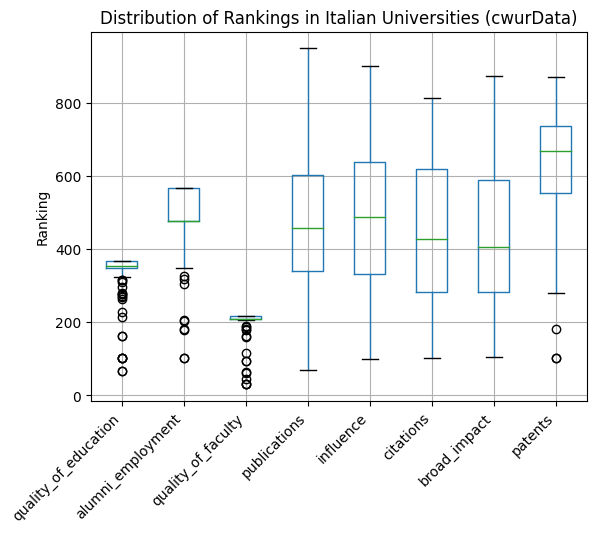

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cwur_df = pd.read_csv('cwurData.csv')

italian_universities = cwur_df[cwur_df['country'] == 'Italy']

cwur_features = ['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']

italian_universities[cwur_features].boxplot()
plt.ylabel('Ranking')
plt.title('Distribution of Rankings in Italian Universities (cwurData)')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-34-b69b6d121754>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italian_universities[times_features] = italian_universities[times_features].apply(pd.to_numeric, errors='coerce')


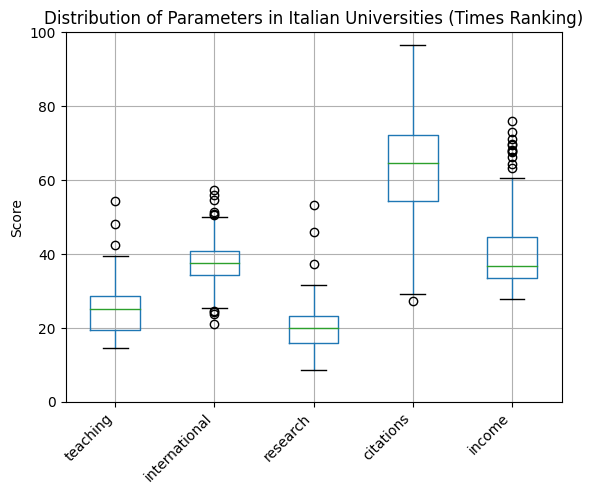

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

times_df = pd.read_csv('timesData.csv')

italian_universities = times_df[times_df['country'] == 'Italy']

times_features = ['teaching', 'international', 'research', 'citations', 'income']

italian_universities[times_features] = italian_universities[times_features].apply(pd.to_numeric, errors='coerce')

italian_universities[times_features].boxplot()
plt.ylabel('Score')
plt.title('Distribution of Parameters in Italian Universities (Times Ranking)')
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 100)

plt.show()


## 2.6 Sostituzione metriche peggiori con valutazione massima, cambiamento in classifica

- utilizzeremo il timesData dato che abbiamo la formula per il totalscore per renderci piu facile il calcolo


In [82]:
import pandas as pd

times_df = pd.read_csv('timesData_estimated_total_score.csv')

italian_universities_2016 = times_df[(times_df['country'] == 'Italy') & (times_df['year'] == 2016)].copy()

times_features = ['teaching', 'international', 'research', 'citations', 'income']

italian_universities_2016[times_features] = italian_universities_2016[times_features].apply(pd.to_numeric, errors='coerce')

original_total_scores_2016 = times_df[times_df['year'] == 2016].copy()

italian_universities_2016['teaching'] = 99

italian_universities_2016['total_score'] = (
    0.3 * italian_universities_2016['teaching'] +
    0.075 * italian_universities_2016['international'] +
    0.3 * italian_universities_2016['research'] +
    0.3 * italian_universities_2016['citations'] +
    0.025 * italian_universities_2016['income']
).round(1)

original_total_scores_2016.loc[(original_total_scores_2016['country'] == 'Italy') & (original_total_scores_2016['year'] == 2016), 'total_score'] = italian_universities_2016['total_score'].values

original_total_scores_2016['world_rank'] = original_total_scores_2016['total_score'].rank(ascending=False, method='min').astype(int)

top_index = original_total_scores_2016['world_rank'].idxmin()
current_top_score = original_total_scores_2016.at[top_index, 'total_score']

while True:
    italian_universities_2016['world_rank'] = original_total_scores_2016['world_rank']
    top_italian_index = italian_universities_2016['world_rank'].idxmin()

    if italian_universities_2016.at[top_italian_index, 'total_score'] <= current_top_score:
        break

    original_total_scores_2016.at[top_index, 'world_rank'], italian_universities_2016.at[top_italian_index, 'world_rank'] = italian_universities_2016.at[top_italian_index, 'world_rank'], original_total_scores_2016.at[top_index, 'world_rank']
    current_top_score = italian_universities_2016.at[top_italian_index, 'total_score']

original_total_scores_2016.sort_values(by='world_rank', inplace=True)

original_total_scores_2016.to_csv('timesData_teaching99.csv', index=False)


In [83]:
import pandas as pd

italians_assigned_rank_df = pd.read_csv('timesData_teaching99.csv')

italian_universities = italians_assigned_rank_df[italians_assigned_rank_df['country'] == 'Italy']

times_df = pd.read_csv('timesData_estimated_total_score.csv')

italian_universities_2016 = times_df[(times_df['country'] == 'Italy') & (times_df['year'] == 2016)]

print(italian_universities_2016[['university_name', 'country', 'world_rank', 'total_score']])
print(italian_universities[['university_name', 'country', 'world_rank', 'total_score']])




                              university_name country world_rank  total_score
1915         Scuola Normale Superiore di Pisa   Italy        112         57.1
1983               Scuola Superiore Sant’Anna   Italy       =180         50.2
2000                     University of Trento   Italy        198         49.1
2005                    University of Bologna   Italy    201-250         46.4
2035          Polytechnic University of Milan   Italy    201-250         46.7
2038              Sapienza University of Rome   Italy    201-250         44.5
2124                      University of Milan   Italy    301-350         39.7
2125              University of Milan-Bicocca   Italy    301-350         38.4
2128         University of Naples Federico II   Italy    301-350         39.0
2136                      University of Padua   Italy    301-350         40.5
2137                      University of Pavia   Italy    301-350         38.6
2146                    University of Trieste   Italy    301-350

## 2.7 Ratio studenti internazionali

<ipython-input-112-52648a617c35>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')


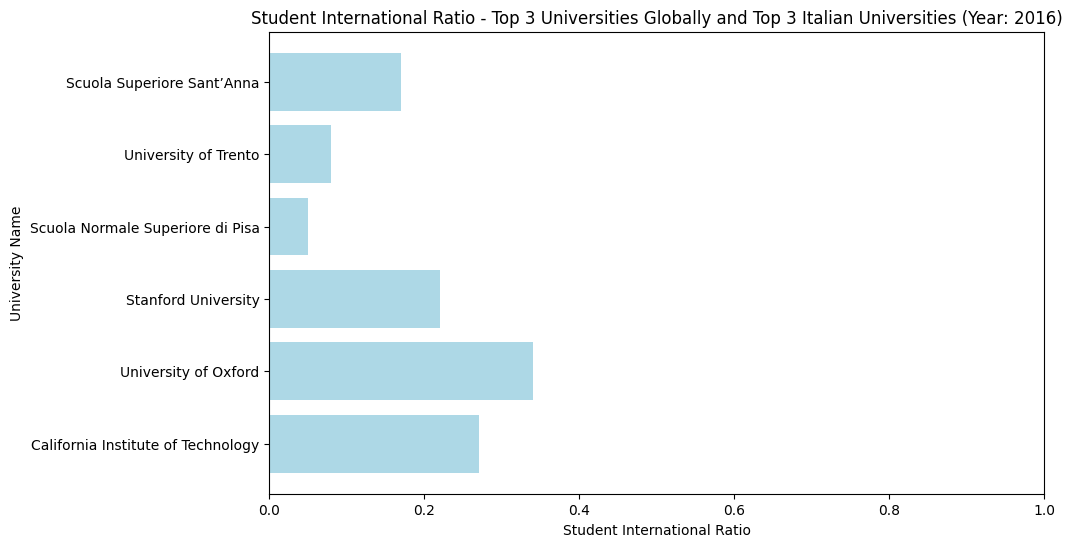

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

times_df = pd.read_csv('timesData_estimated_total_score.csv')
latest_year_times = times_df['year'].max()
latest_times_df = times_df[times_df['year'] == latest_year_times]

latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')

top_3_world_universities = latest_times_df.nsmallest(3, 'world_rank')

top_3_italian_universities = latest_times_df[latest_times_df['country'] == 'Italy'].nsmallest(3, 'world_rank')

top_3_universities = pd.concat([top_3_world_universities, top_3_italian_universities])

plt.figure(figsize=(10, 6))
ax = plt.barh(top_3_universities['university_name'], top_3_universities['international_students'].str.rstrip('%').astype('float') / 100, color=['lightblue'])
plt.title(f'Student International Ratio - Top 3 Universities Globally and Top 3 Italian Universities (Year: {latest_year_times})')
plt.xlabel('Student International Ratio')
plt.ylabel('University Name')
plt.xlim(0, 1)
plt.show()


## 2.8 Ratio studentesse

<ipython-input-76-63b236343c0d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')


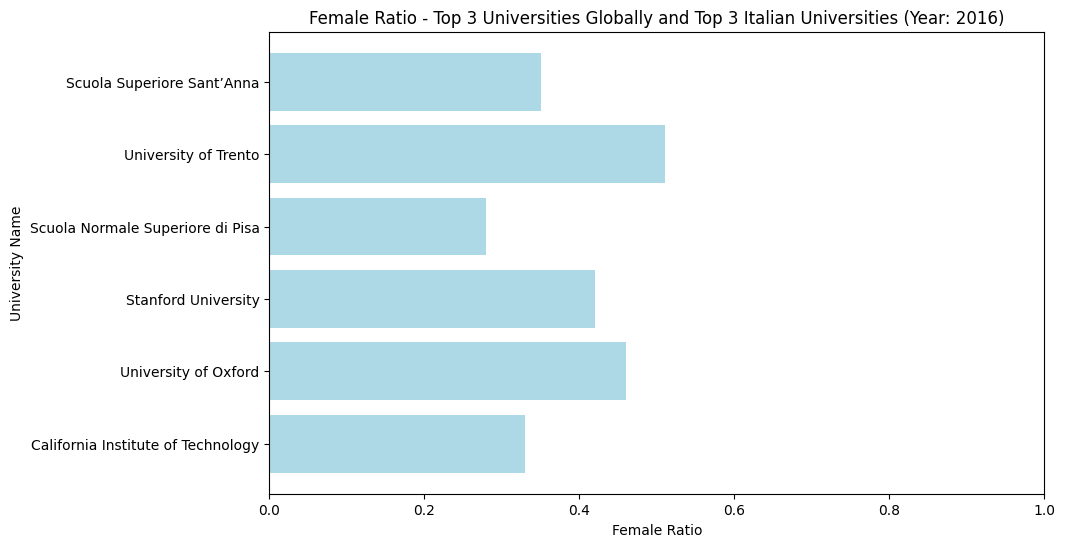

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

times_df = pd.read_csv('timesData_estimated_total_score.csv')

latest_year_times = times_df['year'].max()
latest_times_df = times_df[times_df['year'] == latest_year_times]

latest_times_df['world_rank'] = pd.to_numeric(latest_times_df['world_rank'], errors='coerce')

top_3_world_universities = latest_times_df.nsmallest(3, 'world_rank')

top_3_italian_universities = latest_times_df[latest_times_df['country'] == 'Italy'].nsmallest(3, 'world_rank')

top_3_universities = pd.concat([top_3_world_universities, top_3_italian_universities])

def extract_female_ratio(ratio_str):
    if pd.notna(ratio_str):
        parts = ratio_str.split(':')
        if len(parts) == 2:
            return int(parts[0]) / (int(parts[0]) + int(parts[1]))
    return pd.NA

top_3_universities['female_ratio'] = top_3_universities['female_male_ratio'].apply(extract_female_ratio)

plt.figure(figsize=(10, 6))
ax = plt.barh(top_3_universities['university_name'], top_3_universities['female_ratio'], color=['lightblue'])
plt.title(f'Female Ratio - Top 3 Universities Globally and Top 3 Italian Universities (Year: {latest_year_times})')
plt.xlabel('Female Ratio')
plt.ylabel('University Name')
plt.xlim(0, 1)
plt.show()


# 3 Incidenza donne nel mondo dell'università

##3.1 Incidenza percentuale delle donne presenti nella classifica mondiale di una università + Linear Regression

In [11]:
import pandas as pd

df = pd.read_csv('timesData_estimated_total_score.csv')

df['world_rank'] = df['world_rank'].str.replace('=', '').str.replace('<', '')
df['world_rank'] = df['world_rank'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))

df['world_rank'] = df.groupby(['year']).cumcount() + 1

df.to_csv('timesData_unique_ranking.csv', index=False)


## Viene creato un nuovo CSV cambiando la colonna "female_male_ratio" in "female_percentage" contenendo, ovviamente, solo la percentuale di donne dell'anno 2016 e di tutti gli anni

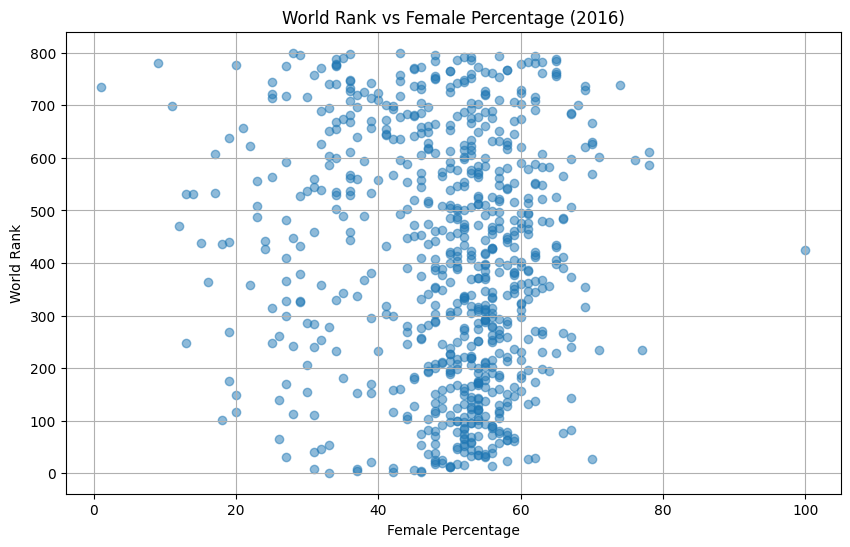

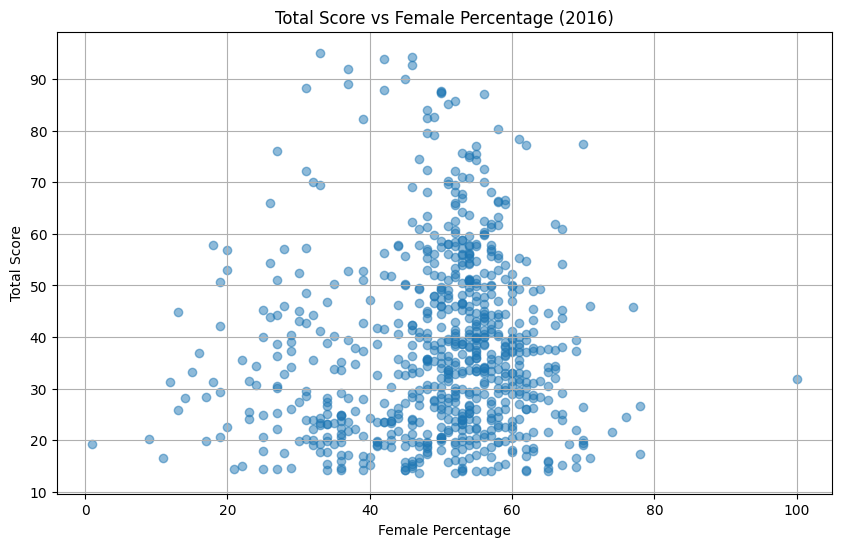

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timesData_unique_ranking.csv')

df['female_percentage'] = pd.to_numeric(df['female_male_ratio'].str.split(':').str[0], errors='coerce')

df_2016 = df[df['year'] == 2016]

plt.figure(figsize=(10, 6))
plt.scatter(df_2016['female_percentage'], df_2016['world_rank'], alpha=0.5)
plt.title('World Rank vs Female Percentage (2016)')
plt.xlabel('Female Percentage')
plt.ylabel('World Rank')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.scatter(df_2016['female_percentage'], df_2016['total_score'], alpha=0.5)
plt.title('Total Score vs Female Percentage (2016)')
plt.xlabel('Female Percentage')
plt.ylabel('Total Score')
plt.grid(True)

plt.show()


### 3.1.1 Tracking linear regression for world_rank vs female percentage

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
7.5333071090163735 2.615446343983435


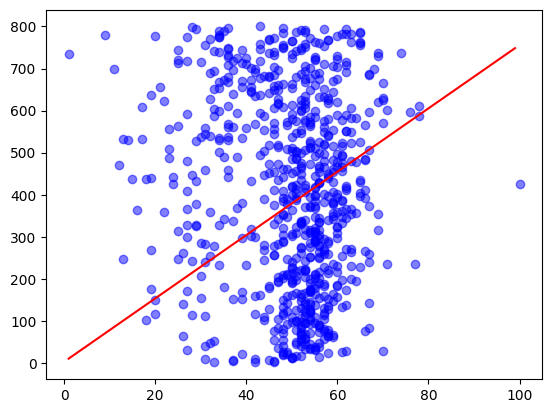

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('timesData_2016.csv')

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].female_percentage
        y = points.iloc[i].world_rank

        if pd.notna(x) and pd.notna(y):
            m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
            b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

m = 0
b = 0
L = 0.0001
epochs = 500

for i in range(epochs):
    if i % 50 == 0:
        print(f'Epoch: {i}')
    m, b = gradient_descent(m, b, data, L)

print(m, b)


plt.scatter(data.female_percentage, data.world_rank, color='blue', alpha=0.5)
plt.plot(list(range(1, 100)), [m * x + b for x in range(1, 100)], color='red')
plt.show()


## 3.2 usando K-Means vediamo se esiste una correlazione tra alcune features e la percentuale di donne

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('timesData_females.csv')

selected_features = ['teaching', 'research', 'citations', 'female_percentage']

df = df.dropna(subset=['female_percentage'])

X = df[selected_features].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

kmeans_model = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans_model.fit_predict(X_normalized)

cluster_centers = kmeans_model.cluster_centers_

for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"\nCluster {cluster_num + 1} - Number of Universities: {len(cluster_data)}")
    print(f"Cluster Center (Teaching, Research, Citations, Female Percentage): {cluster_centers[cluster_num]}")
    print(f"Average Teaching: {cluster_data['teaching'].mean()}")
    print(f"Average Research: {cluster_data['research'].mean()}")
    print(f"Average Citations: {cluster_data['citations'].mean()}")
    print(f"Average Female Percentage: {cluster_data['female_percentage'].mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 1 - Number of Universities: 567
Cluster Center (Teaching, Research, Citations, Female Percentage): [ 1.36444878  1.37627226  0.89665623 -0.01045982]
Average Teaching: 60.528571428571425
Average Research: 64.036860670194
Average Citations: 81.70370370370371
Average Female Percentage: 49.55731922398589

Cluster 2 - Number of Universities: 414
Cluster Center (Teaching, Research, Citations, Female Percentage): [-0.25719654 -0.3179833  -0.91041406 -1.58671343]
Average Teaching: 32.73647342995169
Average Research: 28.674637681159417
Average Citations: 39.996859903381655
Average Female Percentage: 32.45652173913044

Cluster 3 - Number of Universities: 1386
Cluster Center (Teaching, Research, Citations, Female Percentage): [-0.48269136 -0.46937008 -0.09558795  0.47858522]
Average Teaching: 28.887950937950936
Average Research: 25.53225108225108
Average Citations: 58.801082251082256
Average Female Percentage: 54.88167388167388
